In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv ('/kaggle/input/magic-gamma-telescope-dataset/telescope_data.csv')
df = df.drop(columns = df.columns[0])
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


We are going to predict the class based on the other future values. As it's better to covert everything to numbers, let's convert class to numbers

In [3]:
df['class'] = (df['class']=='g').astype(int)

For all the columns until the lsat 1, identify any relationship with the gamma values in class column using plots. We see that there is a different pattern with fAlpha

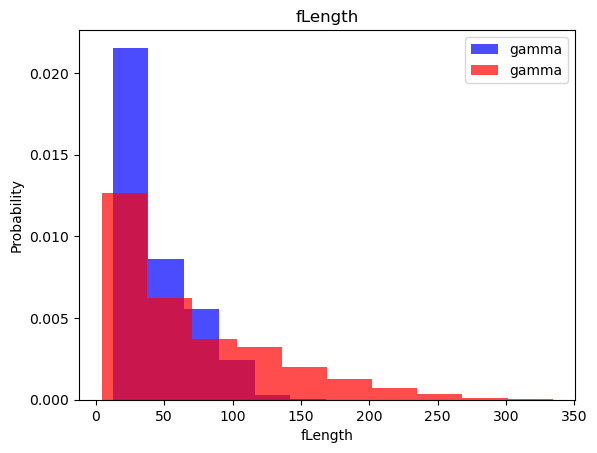

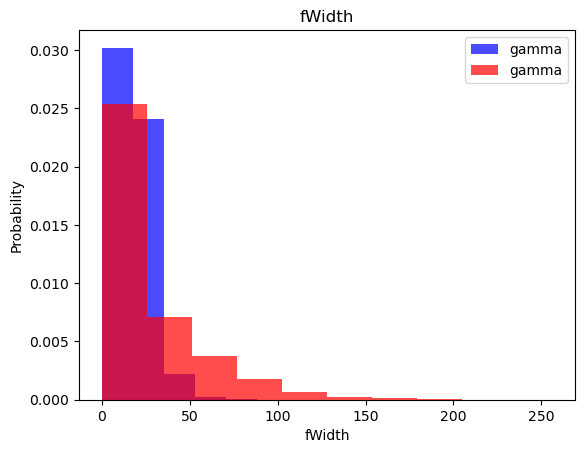

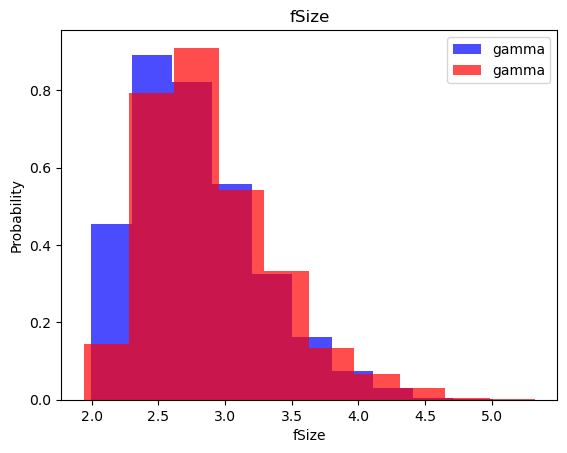

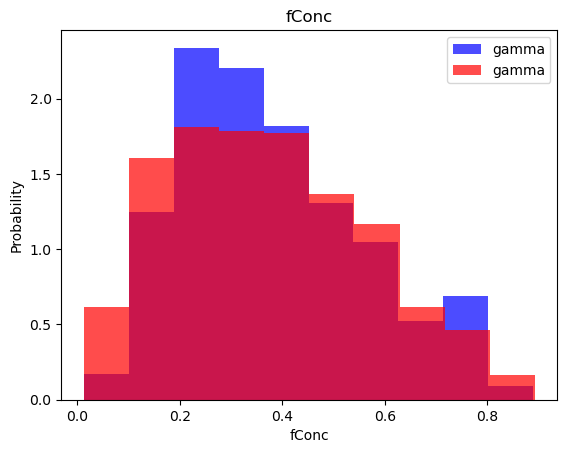

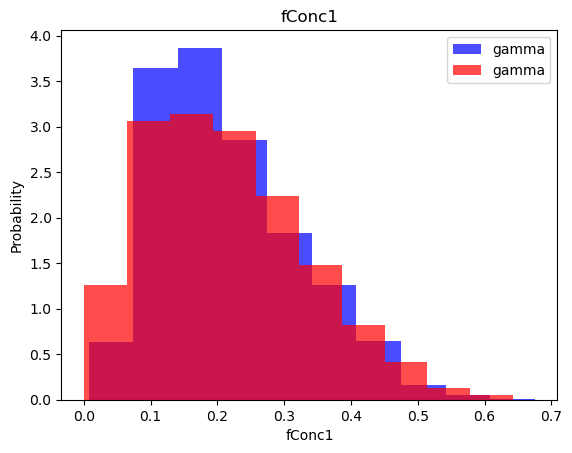

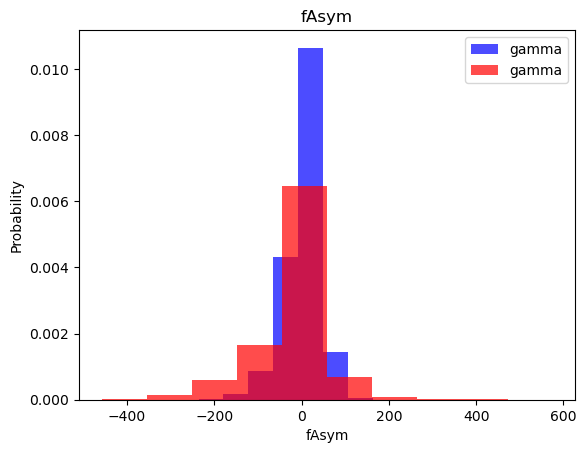

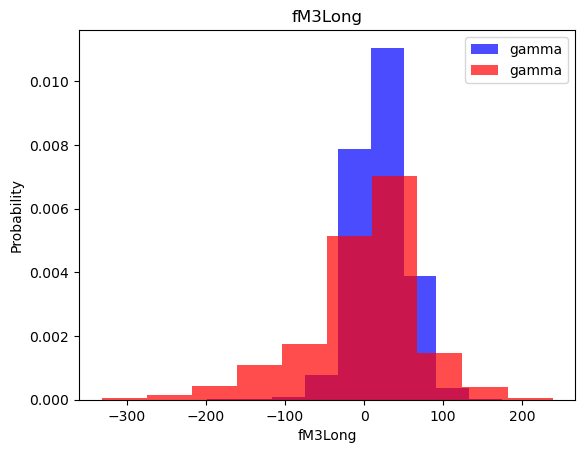

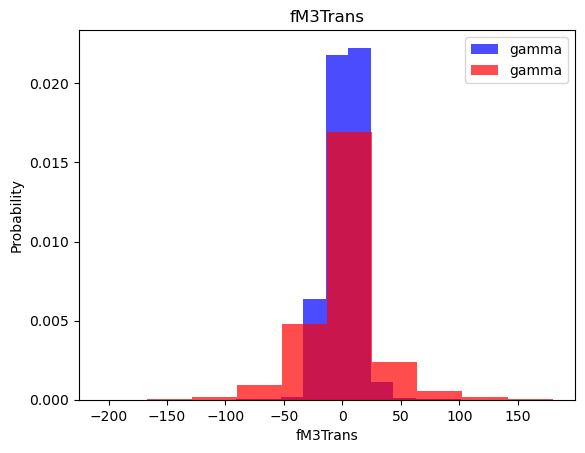

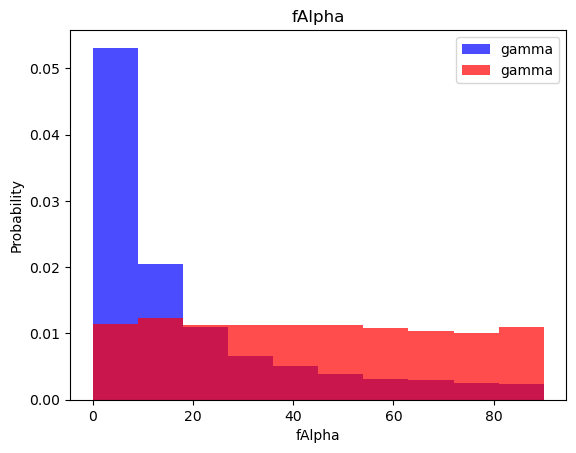

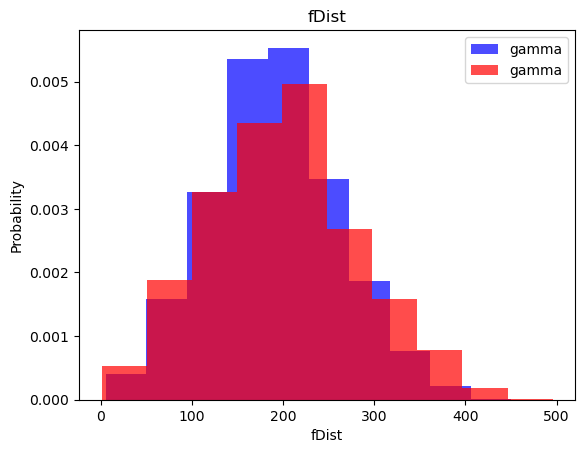

In [4]:
cols = df.columns.values.tolist()
for column in cols[:-1]:
    plt.hist(df[df['class']==1][column], color='blue', label='gamma',alpha=0.7, density='True')
    plt.hist(df[df['class']==0][column], color='red', label='gamma',alpha=0.7, density='True')
    plt.title(column)
    plt.ylabel('Probability')
    plt.xlabel(column)
    plt.legend()
    plt.show()

Creating train, validate, and test datasets by allotting 0 to 60 percent to train, 6 to 8 percent to validate, and the rest to test

In [5]:
train, validate, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

Comparing the length of the train datasets, we see that this is not equivalent, so we need to increase the number of the values that are less. in this case the values with 0. It is called over-sampling and we use a library to do that.

In [6]:
print(len(train[train['class']==1]))
print(len(train[train['class']==0]))

7378
4034


Normalize columns so that the values are simlar to the mean and standard deviation and all the columns have similar values

In [7]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    Y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    
    X = scaler.fit_transform(X)
    
    if oversample:
        ros = RandomOverSampler()
        X,Y = ros.fit_resample(X, Y)
    
    data = np.hstack((X, np.reshape(Y, (-1, 1))))
    return data, X, Y

In [8]:
train, x_train, y_train = scale_dataset(train, oversample=True)
print(len(train))
print(len(x_train))
print(len(y_train))
# Now we see that both the values are equivalent
print(sum(y_train==1))
print(sum(y_train==0))

# Test and validate need not be oversampled, made equivalent as we need to test randomness of data in results
validate, x_validate, y_validate = scale_dataset(validate, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

14756
14756
14756
7378
7378


# APPLYING DIFFERENT MODELS

## 1. KNN